# DATA 311 Lab 2
## Alex Isbill

## Part 1
>### 2. Find out how often Bellingham was overcast in each month of 2020.

**Approach:**
* Overcast is defined as when 8 oktas of the sky is covered by clouds and dentoted as OVC in the HourlySkyConditions column.
* For each month, we will calculate the number of hours that Bellingham was overcast vs the number of hours that Bellingham was not overcast.
* If we make this a ratio (hours overcast / hours not overcast) this will give us a percent of how often it was overcast in each month.
* We can then put these numbers into a table to compare the months over 2020 and see which were the most overcast.

In [29]:
import pandas as pd

# Using function from lecture to get csv at url of city
def data_url(city_name):
    base_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/csci141_21s/fp/data/"
    return base_url + city_name + ".csv"

# Using df for Bellingham to get relevant columns, filtering for only hourly reports and 
# converting HourlySkyCondtions to string to be able to use effectivly with mask (could not use mask to compare NAN objects with strings)
bham = pd.read_csv(data_url("WA_Bellingham"), low_memory=False)
overcast = bham[["DATE","REPORT_TYPE","HourlySkyConditions"]]
mask = overcast["REPORT_TYPE"] == "FM-15"
overcast = overcast[mask]
overcast["DATE"] = pd.to_datetime(overcast["DATE"])
overcast["HourlySkyConditions"] = overcast["HourlySkyConditions"].astype(str)

### Main function used to gather monthly overcast data
1. Iterate through an array with start and end dates for each month in order to grab monthly data.
2. Get the total number of hours by looking at the number of hourly observations in each month.
    * Testing this showed that this number could be off by 0-5 hours but this did not make a significant difference in the final result.
3. Create a mask that filters for reports that contain "OVC" to find the number of hours that were reported to be overcast.
    * Looking at the documentation, all other letter codes indicate a sky condition that is not overcast except possibly in the case of an "Obscured Sky". For obscured data, we assume that the sky was not overcast and the relative infrequency does not impact the accuracy of the analysis.
4. Calculate the percent that the month was overcast by dividing the number of hours that were overcast by the total hours and multiplying by 100.
5. Append info to an array and move to the next month.

In [30]:
def month_overcast(yearly_data):
    months_data = []
    dates = ["2020-01-01", "2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01"]
    for i in range(len(dates)-1):
        start = dates[i]
        end = dates[i+1]
        mask = ((overcast["DATE"] > start) & (overcast["DATE"] < end))
        month = overcast[mask]
        total_hours = month.shape[0]
        month_ovc_mask = month["HourlySkyConditions"].str.contains("OVC")
        month = month[month_ovc_mask]
        num_hours_ovc = month.shape[0]
        percent_ovc = (num_hours_ovc/total_hours)*100
        months_data.append(percent_ovc)
    return months_data

### Creating monthly overcast dataframe
Here, we create a dataframe by taking the data from the month_overcast function and adding it to a dataframe with the corresponding names of months in order to display the information in a bar plot.

<AxesSubplot:xlabel='Month'>

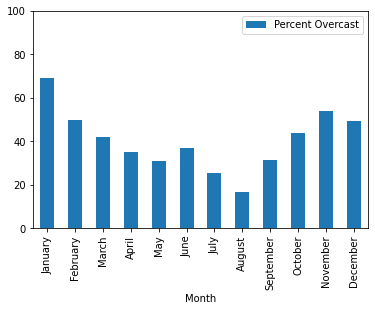

In [31]:
year_data = month_overcast(overcast)
overcast_data = {'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','November','December'],
                  'Percent Overcast': year_data}
overcast_df = pd.DataFrame(overcast_data)
overcast_df.plot.bar(x="Month", ylim=(0,100))

### Summary
* The historgram gives a clean visual repreasentation of the percent overcast each month is (number of hours that are overcast vs not overcast).
* Unsurpisingly, the Fall and Winter months tend to be the most overcast with a max of 66% overcast in January.
* Further analysis could show a complete representation of the hourly sky conditions, showing the percent of hours of each weather condition (clear, partly cloudy, etc.)